On the provided "Online News Popularity Data Set," you need to implement the following models without using scikit-learn libraries:

1.Decision Trees (from scratch)

2.Linear Regression (without regularization, L1 regularization, L2 regularization, and elastic net)

3.Classification with Linear Regression (using the threshold function seen in class)

4.Logistic Regression for Classification

5.Regression with k-Nearest Neighbors algorithm

6.Classification with k-Nearest Neighbors algorithm

7.Regression with Neural Networks

8.Classification with Neural Networks

You can use scikit-learn only to verify that your implemented models behave correctly.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df = df.rename(columns=lambda x: x.strip())
df = df.iloc[: , 2:]

In [4]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
df.isnull().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_s

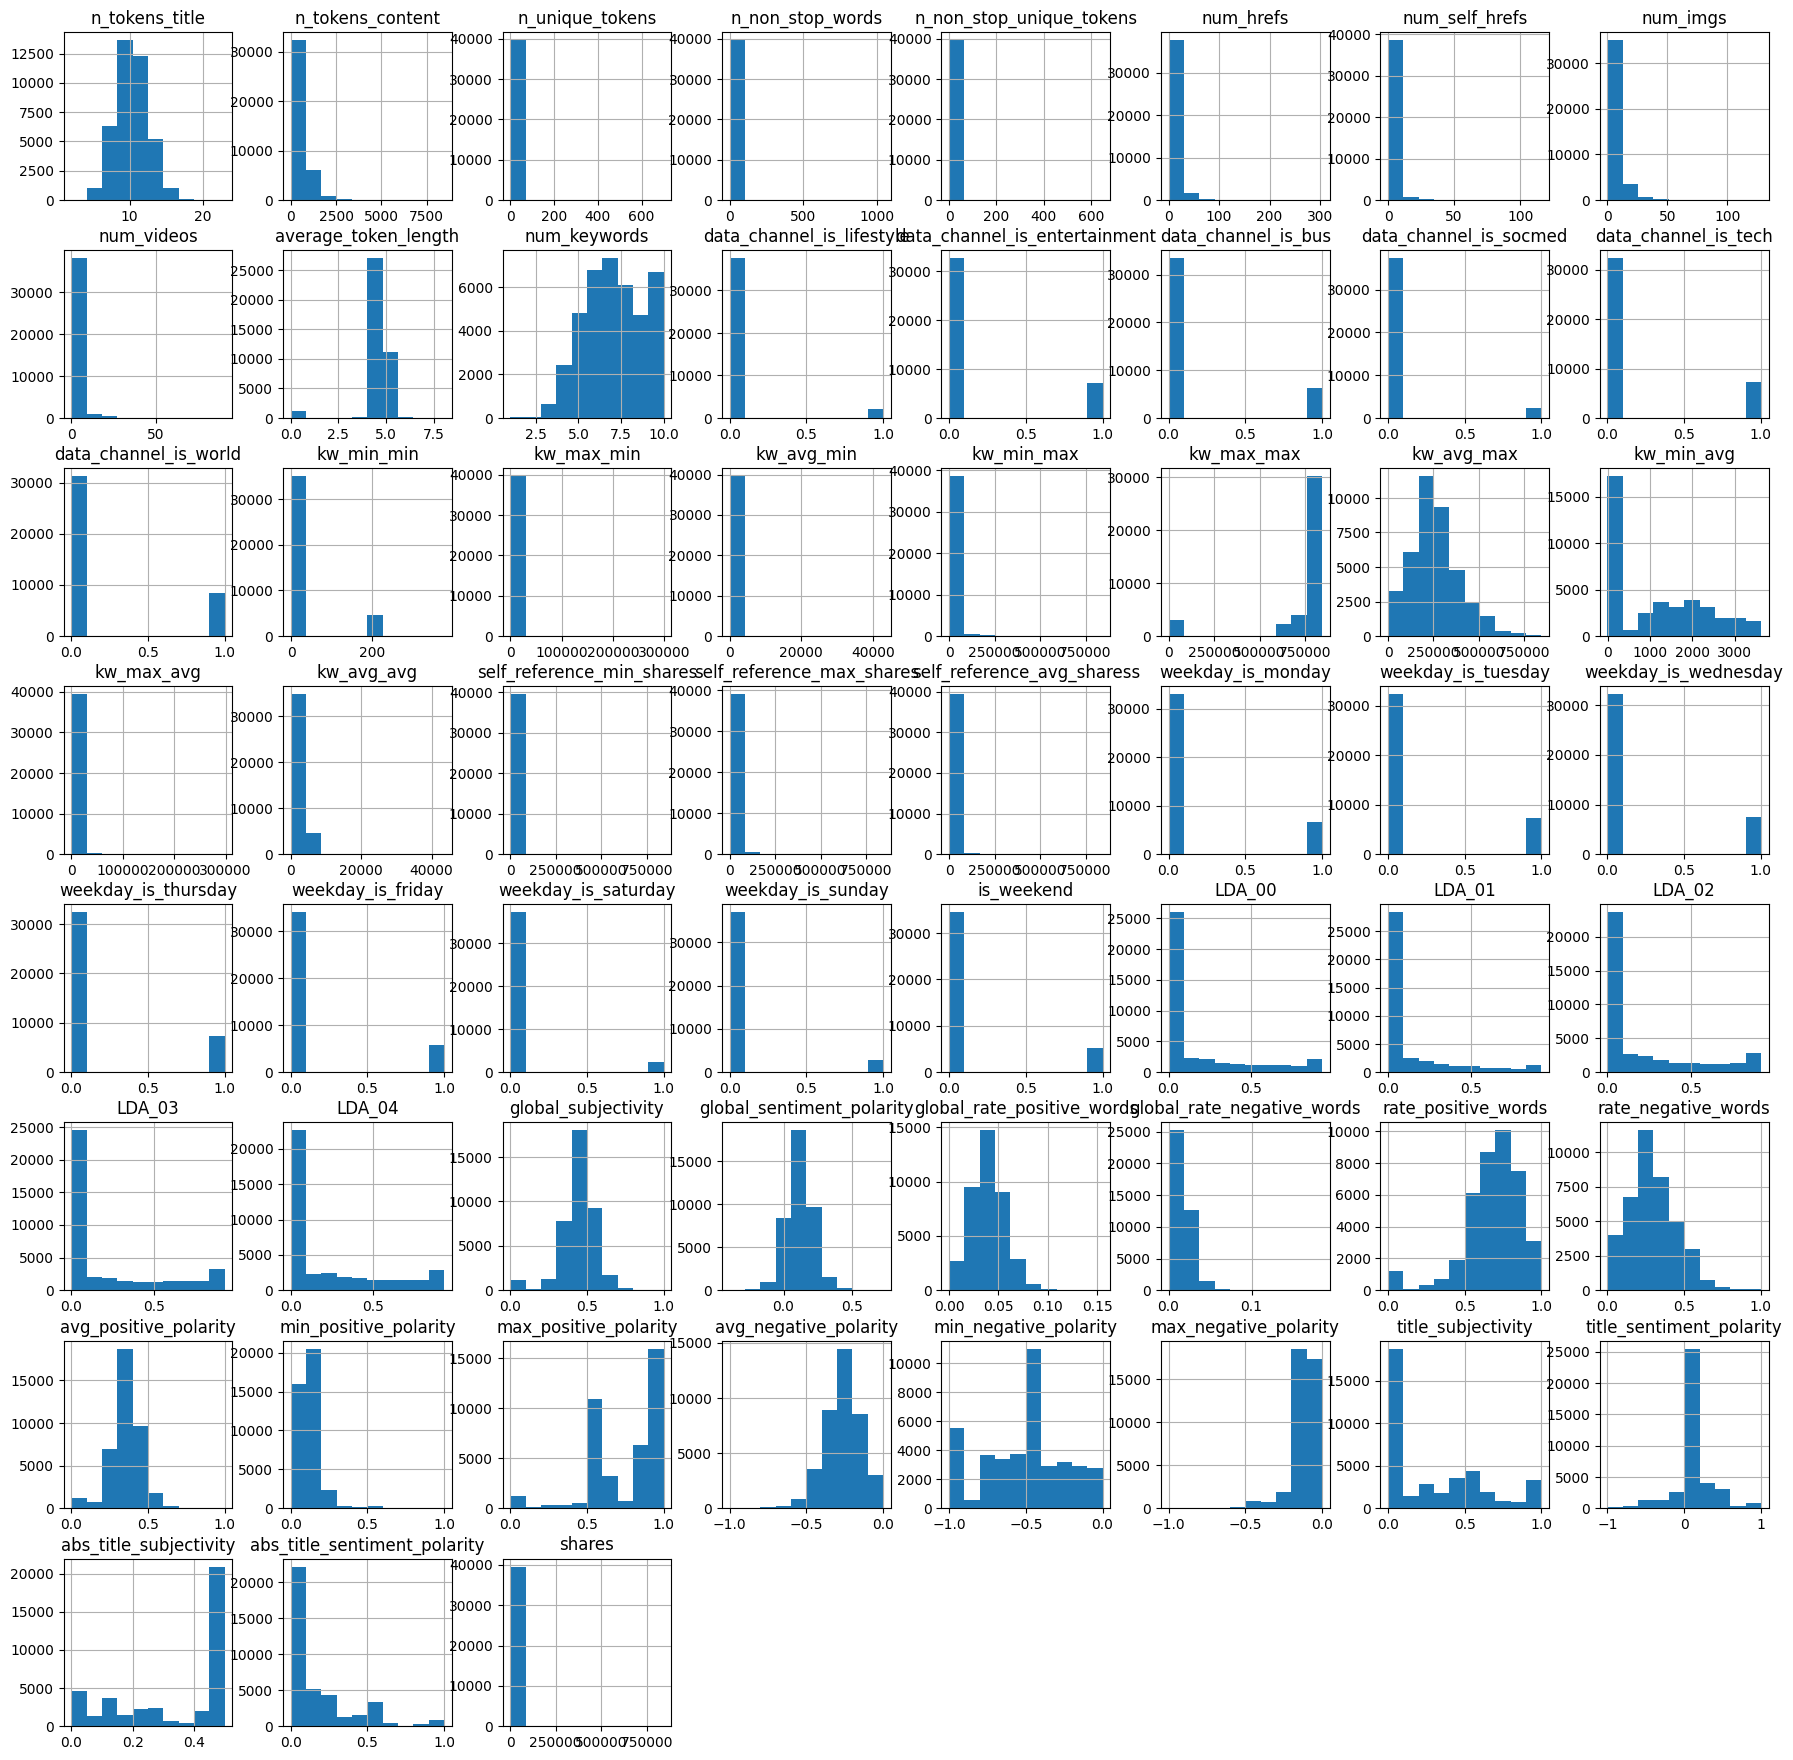

In [6]:
plot = df.hist(figsize=(22,22))

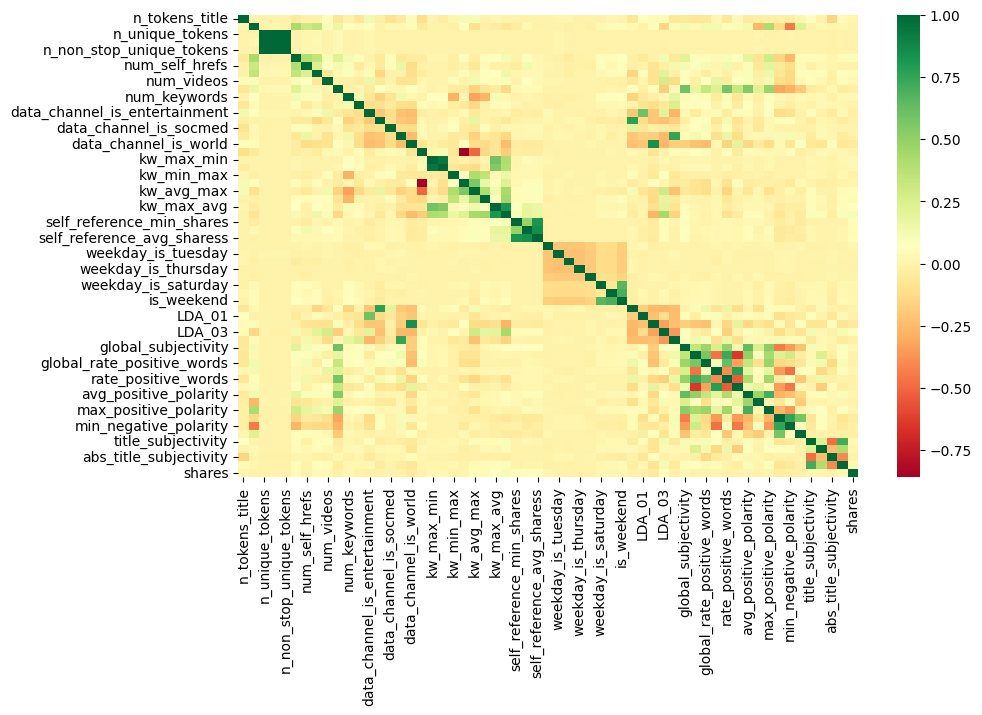

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()

# Set figure size
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap ='RdYlGn')
plt.show()

In [7]:
X = df.drop('shares', axis=1)  # Features
y = df['shares']  # Target variable

In [8]:
y

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 39644, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

DecisionTree

In [37]:
import pandas as pd

class DecisionTreeRegressor:
    def __init__(self):
        self.tree = None

    def mean_squared_error(self, y):
        return ((y - y.mean())**2).mean()

    def best_split(self, X, y):
        best_feature = None
        best_mse = float('inf')
        best_value = None

        for feature in X.columns:
            values = X[feature].unique()
            for value in values:
                left_indices = X[feature] <= value
                right_indices = X[feature] > value
                left_mse = self.mean_squared_error(y[left_indices])
                right_mse = self.mean_squared_error(y[right_indices])
                mse = (left_indices.mean() * left_mse) + (right_indices.mean() * right_mse)

                if mse < best_mse:
                    best_feature = feature
                    best_mse = mse
                    best_value = value

        return best_feature, best_value

    def create_leaf_node(self, y):
        return y.mean()

    def split(self, X, y, feature, value):
        left_indices = X[feature] <= value
        right_indices = X[feature] > value
        return X[left_indices], y[left_indices], X[right_indices], y[right_indices]

    def fit(self, X, y):
        if len(y.unique()) == 1:
            self.tree = self.create_leaf_node(y)
            return

        best_feature, best_value = self.best_split(X, y)
        if best_feature is None:
            self.tree = self.create_leaf_node(y)
            return

        left_X, left_y, right_X, right_y = self.split(X, y, best_feature, best_value)
        self.tree = {
            'feature': best_feature,
            'value': best_value,
            'left': DecisionTreeRegressor(),
            'right': DecisionTreeRegressor()
        }

        self.tree['left'].fit(left_X, left_y)
        self.tree['right'].fit(right_X, right_y)

    def predict(self, X):
        if isinstance(self.tree, dict):
            feature = self.tree['feature']
            value = self.tree['value']
            if X[feature] <= value:
                return self.tree['left'].predict(X)
            else:
                return self.tree['right'].predict(X)
        else:
            return self.tree


In [30]:
# X_train = X_train.values  # Convert X_train to numpy array
# X_test = X_test.values  # Convert X_test to numpy array

# y_train = y_train.values  # Convert y_train to numpy array
# y_test = y_test.values  # Convert y_test to numpy array

In [38]:
# Create an instance of DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()

# Train the decision tree model
decision_tree.fit(X_train, y_train)

# Predict on the testing set
predictions = decision_tree.predict(X_test)

# Evaluation metrics
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r_squared(y_test, predictions)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)


KeyboardInterrupt: 

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error

tree = DecisionTreeRegressor()

# Train the decision tree model
tree.fit(X_train, y_train)

# Predict on the testing set
predictions = tree.predict(X_test)

print(r2_score(y_test,predictions))
print(mean_absolute_error(y_test,predictions))


-1.2402835813228763
4285.921299566138
